In [4]:
import numpy as np
import os

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.utils import to_categorical
K.set_image_dim_ordering('th')
from sklearn.preprocessing import MinMaxScaler

C:\Users\Erin.Ford\anaconda\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
cat = np.load('cat.npy')
penguin = np.load('penguin.npy')
ant = np.load('ant.npy')
bee = np.load('bee.npy')
flamingo = np.load('flamingo.npy')
owl = np.load('owl.npy')
pig = np.load('pig.npy')
dolphin = np.load('dolphin.npy')
snake = np.load('snake.npy')
ice_cream = np.load('ice_cream.npy')
sun = np.load('sun.npy')
mushroom = np.load('mushroom.npy')
flower = np.load('flower.npy')
cactus = np.load('cactus.npy')


# print number of images in dataset and numpy array size of each image
print ("no_of_pics, pixels_size")
print(cat.shape)
print(penguin.shape)
print(ant.shape)
print(bee.shape)


no_of_pics, pixels_size
(123202, 784)
(253791, 784)
(124612, 784)
(120890, 784)


In [3]:
#Add a column to each one as an identifier
cat = np.c_[cat, np.zeros(len(cat))]
penguin = np.c_[penguin, np.ones(len(penguin))]
ant = np.c_[ant, 2*np.ones(len(ant))]
bee = np.c_[bee, 3*np.ones(len(bee))]
flamingo = np.c_[flamingo, 4*np.ones(len(flamingo))]
owl = np.c_[owl, 5*np.ones(len(owl))]
pig = np.c_[pig, 6*np.ones(len(pig))]
dolphin = np.c_[dolphin, 7*np.ones(len(dolphin))]
snake = np.c_[snake, 8*np.ones(len(snake))]
ice_cream = np.c_[ice_cream, 9*np.ones(len(ice_cream))]
sun = np.c_[sun, 10*np.ones(len(sun))]
mushroom = np.c_[mushroom, 11*np.ones(len(mushroom))]
flower = np.c_[flower, 12*np.ones(len(flower))]
cactus = np.c_[cactus, 13*np.ones(len(cactus))]


In [6]:
# merge the arrays, and split the features (X) and labels (y). Convert to float32 to save some memory.
X = np.concatenate((cat[:10000,:-1], penguin[:10000,:-1], ant[:10000,:-1], bee[:10000,:-1], flamingo[:10000,:-1], owl[:10000,:-1], pig[:10000,:-1], dolphin[:10000,:-1], snake[:10000,:-1]\
                   , ice_cream[:10000,:-1], sun[:10000,:-1], mushroom[:10000,:-1], flower[:10000,:-1], cactus[:10000,:-1]), axis=0).astype('float32') # all columns but the last


In [7]:
y = np.concatenate((cat[:10000,-1], penguin[:10000,-1], ant[:10000,-1], bee[:10000,-1],\
                   flamingo[:10000,-1], owl[:10000,-1], pig[:10000,-1], dolphin[:10000,-1], snake[:10000,-1],\
                    ice_cream[:10000,-1], sun[:10000,-1], mushroom[:10000,-1], flower[:10000,-1], cactus[:10000,-1]\
                   ), axis=0).astype('float32') # the last column

In [8]:
# train/test split (divide by 255 to obtain normalized values between 0 and 1)
# Use a 50:50 split, training the models on 10'000 samples and thus have plenty of samples to spare for testing.
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.2,random_state=0)

In [10]:
# one hot encode outputs
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

# reshape to be [samples][pixels][width][height]
X_train_cnn = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
s = X_train_cnn.shape
print (s, num_classes)

(112000, 1, 28, 28) 14


In [3]:
model = Sequential()

NameError: name 'Sequential' is not defined

In [12]:
model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Dropout(0.2))
model.add(Flatten())
    
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
#compile the model
model.compile(loss="categorical_crossentropy",
             optimizer ="adam", metrics=["accuracy"])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               48128     
__________

In [16]:
model.fit(
    X_train_cnn,
    y_train_cnn,
    validation_data=(X_test_cnn, y_test_cnn),
    epochs = 30,
    batch_size = 50
)

model.save_weights('quickdraw_neuralnet.h5')
model.save('quickdraw.model')
print ("Model is saved")

Train on 112000 samples, validate on 28000 samples
Epoch 1/30
112000/112000 [==============================] - 271s 2ms/step - loss: 0.8590 - acc: 0.7332 - val_loss: 0.5634 - val_acc: 0.8257
Epoch 2/30
112000/112000 [==============================] - 294s 3ms/step - loss: 0.5727 - acc: 0.8219 - val_loss: 0.4840 - val_acc: 0.8496
Epoch 3/30
112000/112000 [==============================] - 312s 3ms/step - loss: 0.4948 - acc: 0.8450 - val_loss: 0.4355 - val_acc: 0.8665
Epoch 4/30
112000/112000 [==============================] - 306s 3ms/step - loss: 0.4499 - acc: 0.8587 - val_loss: 0.4130 - val_acc: 0.8729
Epoch 5/30
112000/112000 [==============================] - 309s 3ms/step - loss: 0.4174 - acc: 0.8687 - val_loss: 0.3940 - val_acc: 0.8772
Epoch 6/30
112000/112000 [==============================] - 307s 3ms/step - loss: 0.3948 - acc: 0.8753 - val_loss: 0.3803 - val_acc: 0.8828
Epoch 7/30
112000/112000 [==============================] - 462s 4ms/step - loss: 0.3771 - acc: 0.8812 - val_

In [1]:

model.load_weights('quickdraw_neuralnet.h5')

NameError: name 'model' is not defined

In [17]:
model_loss, model_accuracy = model.evaluate(X_test_cnn, y_test_cnn, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.3511195683617677, Accuracy: 0.8943571428571429


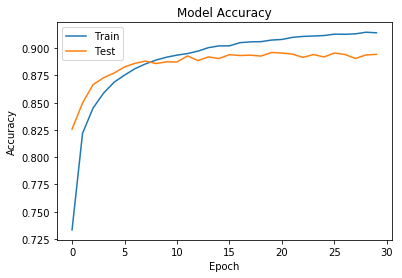

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

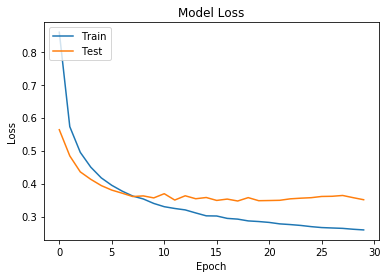

In [19]:
# Summarizing the history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [20]:
model = load_model("quickdraw.model")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               48128     
__________

In [68]:
filepath = "cactus.png"

In [69]:
from keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size = image_size, color_mode = "grayscale")
im

In [70]:
from keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(1, 28, 28)

In [71]:
image /= 255

img = image.flatten().reshape(1,1,28,28)
img.shape

(1, 1, 28, 28)

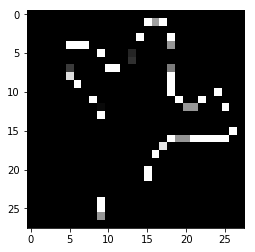

In [72]:
plt.imshow(img.reshape(28, 28), cmap = plt.cm.Greys)

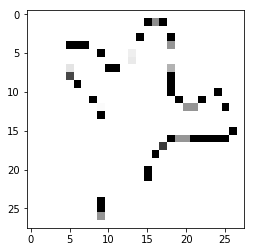

In [73]:
img = 1- img
plt.imshow(img.reshape(28,28), cmap = plt.cm.Greys)

In [2]:
model.load_weights

NameError: name 'model' is not defined

In [74]:
model.predict_classes(img)

array([10], dtype=int64)